# Linear Dimensionality Reduction
The objective of this project is to get familiarize with  the  problem  of  `Dimensionality Reduction` using Principal Component Analysis (PCA) Technique

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data which contains Cartoon faces of 8 subjects and approx. 100 images for each subject. 

In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 5.5 MB/s eta 0:00:0000:0100:01
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached Pillow-9.4.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 5.0 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached numpy-1.24.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached contourpy-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached fonttools-4.39.2-py3-none-any.whl (1.0 MB)


In [3]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [4]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [5]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [6]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


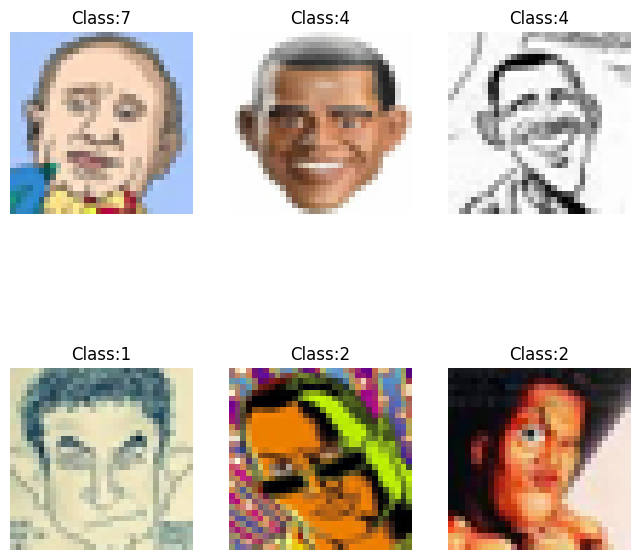

In [7]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [8]:
# write function
def eigen_val_vectors(X):
    values, vectors = np.linalg.eig(X)
    return values, vectors

#### Compute eigen values and plot eigen value spectrum

In [9]:
# eigen values and spectrum
def eigen_spectrum(values):
    X  = []
    Y = []
    for i in range(len(values)):
        X.append(i+1)
        Y.append((values[i]))
    plt.scatter(X,Y)
    plt.xlabel("Principal Components")
    plt.ylabel("Eigen Value")
    plt.yscale('log')
    plt.title("Eigen Spectrum")
    plt.show()

In [10]:
X_flt = X.flatten().reshape(X.shape[0], 32*32*3)

cov_mat = np.cov(X_flt.T)
values,vectors = eigen_val_vectors(cov_mat)

In [11]:
ind = np.argsort(-1*values, axis=0)
sorted_val = values[ind]
sorted_vec = vectors[:,ind]

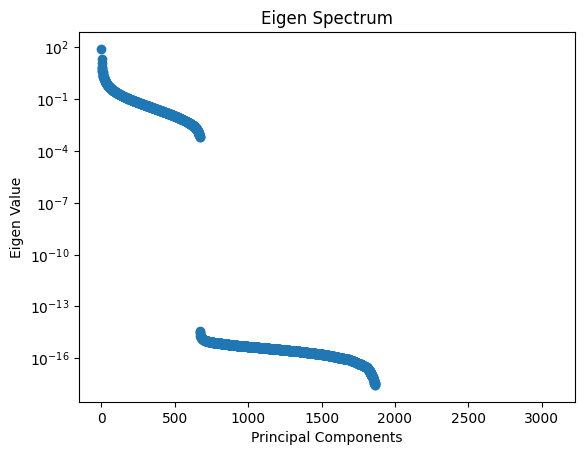

In [12]:
eigen_spectrum(sorted_val.real)

#### Plot the percentage of variances vs the number of principal components

In [13]:
# plot variance vs components
def var_components(values):
    X  = []
    Y = []
    for i in range(len(values)):
        X.append(i+1)
        Y.append(np.sum(abs(values[:i+1])/np.sum(np.abs(values))))
    plt.scatter(X,Y)
    plt.xlabel("Principal Components")
    plt.ylabel("% of Varaince")
    plt.title("% of Varance preserved for number of Pricipal Components")
    plt.show()

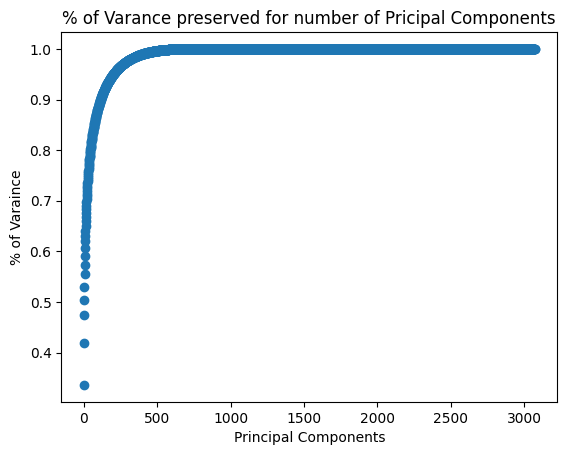

In [14]:
var_components(sorted_val.real)

The above graph shows the cumulative preserved variance against the number of principal components

#### Visualize eigen faces(eigen vectors)

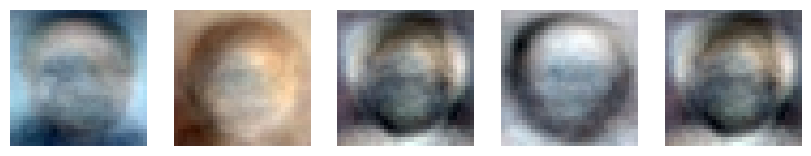

In [15]:
# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
#     pl = pl[:,:,:,::-1]
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(sorted_vec.real,H,W,C, indices)

We can see the ghost faces by plotting the eigen vectors corresponding to dominant eigen values. These ghost faces represent a template(component) which has the most varaince preserved and they give an idea that if we super-impose the data points on these components then they may lie on these template represented by eigen faces.

#### Reconstruction 

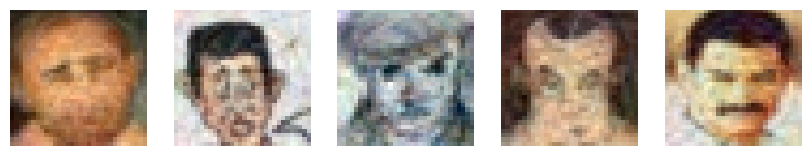

In [16]:
# reconstruction
n_components = 200 
X_recons = np.dot(X_flt,sorted_vec.real[:,:n_components])

X_recons_final = np.dot(X_recons,sorted_vec.real[:,:n_components].T)

plot(X_recons_final.T,W,H,3, [0,6,8,10,16])

In [17]:
def frobenius_norm(X_act,X_tar):
    error_act = np.linalg.norm(X_act, 'fro')
    error_tar = np.linalg.norm(X_tar, 'fro')
    return abs(error_act-error_tar)

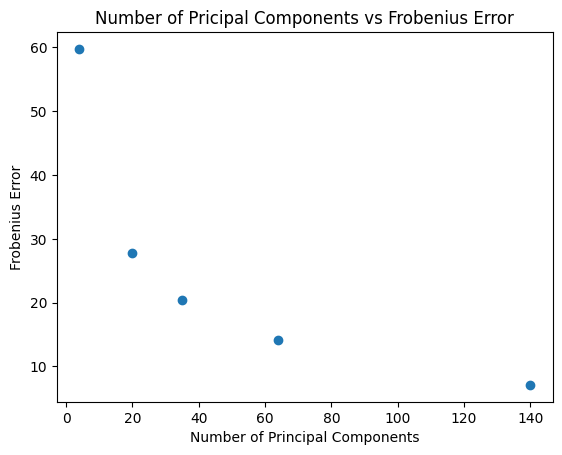

In [18]:
error_fro = []
components = [4,20,35,64,140]
for val in components:
    X_temp_recons = np.dot(X_flt,sorted_vec.real[:,:val-1])
    error_fro.append(frobenius_norm(X_flt,X_temp_recons))
plt.scatter(components,error_fro)
plt.xlabel("Number of Principal Components")
plt.ylabel("Frobenius Error")
plt.title("Number of Pricipal Components vs Frobenius Error")
plt.show()

#### Plot data in 2D

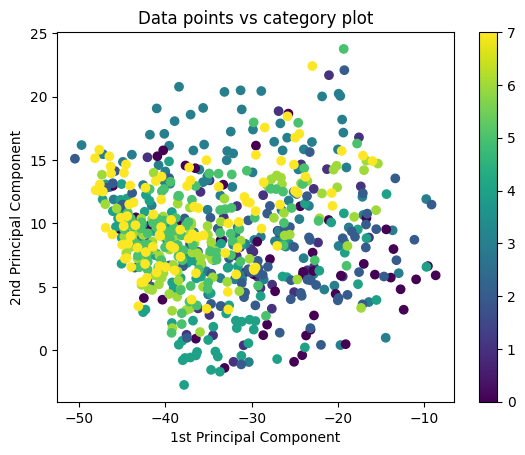

In [19]:
# plot data in 2D
dominant_features = [0,1]
X_dominant_recons = np.dot(X_flt,sorted_vec.real[:,dominant_features[0]:dominant_features[1]+1])
x_pts = X_dominant_recons[:,0]
y_pts = X_dominant_recons[:,1]
scatter = plt.scatter(x_pts,y_pts,c=y)
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("Data points vs category plot")
plt.colorbar(scatter)
plt.show()

The plot shows that the data points when projected on these 2 dominant principal components show that the preserve the varaince of the data. The selected components give the lowest error difference between the data projected on these principal components original data.

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [20]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

In [21]:
def get_key(val):
    for key, value in cfw_dict.items():
         if val == value:
            return key
    return None


Dominant eigen faces for class Amitabhbachan


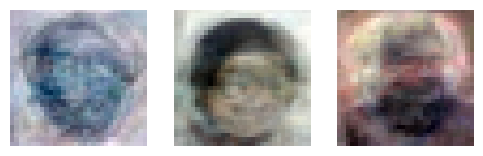


Dominant eigen faces for class AamirKhan


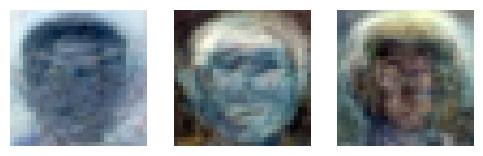


Dominant eigen faces for class DwayneJohnson


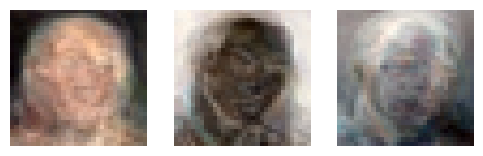


Dominant eigen faces for class AishwaryaRai


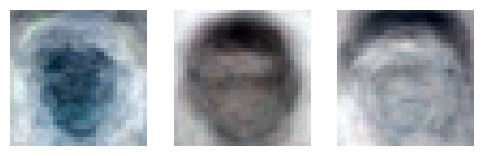


Dominant eigen faces for class BarackObama


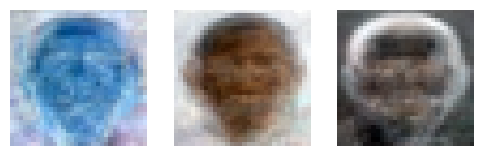


Dominant eigen faces for class NarendraModi


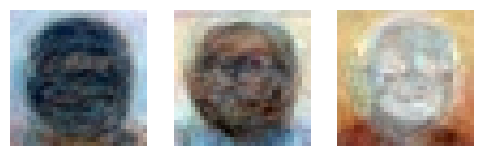


Dominant eigen faces for class ManmohanSingh


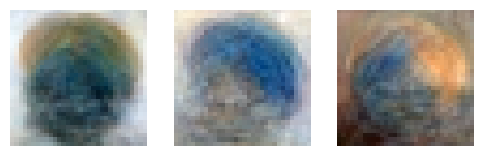


Dominant eigen faces for class VladimirPutin


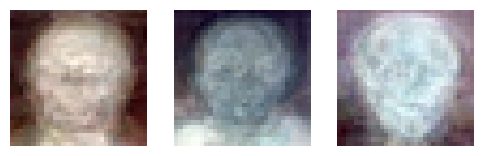

In [22]:
# visualize
eigen_vec_classes = []
eigen_val_classes = []
for val in np.unique(y):
    X_flt_cat = X_flt[y==val]
    cov_mat = np.cov(X_flt_cat.T)
    values_c,vectors_c = eigen_val_vectors(cov_mat)
    eigen_val_classes.append(values_c)
    eigen_vec_classes.append(vectors_c)
    print("\nDominant eigen faces for class {0}".format(get_key(val)))
    plot(vectors_c.real,H,W,C, [0,1,2])

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [24]:
# components required
def components_accuracy(values,accuracy):
    counter = 0
    accuracy_latest = 0
    while accuracy_latest<accuracy and counter<len(values):
        accuracy_latest = accuracy_latest + abs(values[counter])/np.sum(np.abs(values))
        counter = counter + 1
    return counter

print("Number of principal components required for 90% reconstruction of the:\n")
print("Entire Dataset = {0}".format(components_accuracy(values,0.9)))
for i in range(len(eigen_val_classes)):
    print("{0} = {1}".format(get_key(i),components_accuracy(eigen_val_classes[i],0.9)))


Number of principal components required for 90% reconstruction of the:

Entire Dataset = 115
Amitabhbachan = 21
AamirKhan = 24
DwayneJohnson = 28
AishwaryaRai = 36
BarackObama = 43
NarendraModi = 57
ManmohanSingh = 50
VladimirPutin = 44


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

The number of components required to retain 90% varaince for each of the classes is not same to number required for entire dataset. This is because the entire dataset contains all the classes hence it will need more components to accuratly visualize all the data with retaining 90% varaince. As the data is more complex when we consider the whole dataset compared to individual class dataset, we need more pricipal components. We can see for individual classes an average of 35-40 components are requires while for whole dataset, 115 components are required which are more than twice the individual classes due to complex features required to project the dataset onto the principal components 

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [25]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [26]:
# code here
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

X_flt = X.flatten().reshape(X.shape[0], 32*32*3)
reg = LinearRegression().fit(X_flt, label)
reg.score(X_flt, label)

1.0

In [27]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_flt)
reg.fit(X_pca,label)
reg.score(X_pca,label)

0.9461873873155534

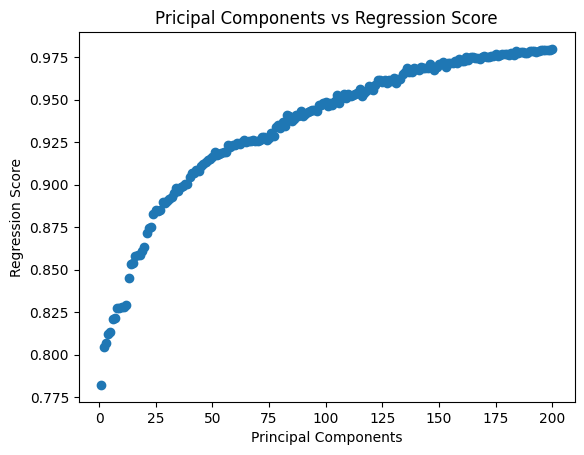

In [28]:
reg_score = []
for i in range(200):
    pca = PCA(n_components=i+1)
    X_pca = pca.fit_transform(X_flt)
    reg.fit(X_pca,label)
    reg_score.append(reg.score(X_pca,label))
plt.scatter(range(1,201),reg_score)
plt.xlabel("Principal Components")
plt.ylabel("Regression Score")
plt.title("Pricipal Components vs Regression Score")
plt.show()

In [29]:
print("Pricipal Components used vs Regression Score table\n\n")
print("Pricipal Components\t\tRegression score\n")
for i in range(0,200,20):
    print("{0}\t\t\t\t{1}".format(i+1,reg_score[i]))
print("{0}\t\t\t\t{1}".format(200,reg_score[199]))

Pricipal Components used vs Regression Score table


Pricipal Components		Regression score

1				0.782125058987676
21				0.8717424299648157
41				0.9067378392029932
61				0.9244434980499885
81				0.9368799858044081
101				0.9461495583972925
121				0.9553872102071614
141				0.9672828110578787
161				0.9728273911167903
181				0.9763462212932297
200				0.9797660910679161


From that graph and table we can observe that for 200 principal components, we can retain more than enough information and apply Linear regression to accurately predict the labels with the score of 97.9%. The dimensions of the dataset after applying PCA is reduced more than 10 times so it makes the linear regression algorithm faster at cost of accuracy. But at 200 principal components, it gives a well enough accuracy for practical use.

Another observation is that as we increase the number of pricipal components, the accuracy score increases rapidly but it slows down with the number of principal components included. After a certain point the increase in accuracy per principal component is very less and likely dosen't affect the model much. So we can safely assume that if we include more than 200 principal components, the benifits of the increase in accuracy score in comparission to increasing the time complexity would diminish significantly. In short there is no use of increasing principal components